Vamos pegar imagens.

In [1]:
from keras.datasets import mnist
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X, test_X=train_X/255.0, test_X/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Colocando as imagens no numpy

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
images=np.array(train_X)
labels=np.array(train_y)

In [3]:
print(train_X.shape)
print(train_y.shape)

(60000, 28, 28)
(60000,)


Montando a convolucional MaxPooling2D

In [4]:
from functools import partial
from tensorflow import keras
DefaultConv2D = partial(keras.layers.Conv2D,
 kernel_size=3, activation='relu', padding="SAME")
model = keras.models.Sequential([
 DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
 keras.layers.MaxPooling2D(pool_size=2),
 DefaultConv2D(filters=128),
 DefaultConv2D(filters=128),
 keras.layers.MaxPooling2D(pool_size=2),
 DefaultConv2D(filters=256),
 DefaultConv2D(filters=256),
 keras.layers.MaxPooling2D(pool_size=2),
 keras.layers.Flatten(),
 keras.layers.Dense(units=128, activation='relu'),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(units=64, activation='relu'),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(units=10, activation='softmax'),
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
history = model.fit(train_X, train_y, epochs=9,
                    validation_data=(test_X, test_y))

Epoch 1/9


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.6550 - loss: 0.9874 - val_accuracy: 0.9862 - val_loss: 0.0570
Epoch 2/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9628 - loss: 0.1482 - val_accuracy: 0.9891 - val_loss: 0.0472
Epoch 3/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9746 - loss: 0.1030 - val_accuracy: 0.9916 - val_loss: 0.0424
Epoch 4/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9801 - loss: 0.0807 - val_accuracy: 0.9902 - val_loss: 0.0453
Epoch 5/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9845 - loss: 0.0701 - val_accuracy: 0.9929 - val_loss: 0.0363
Epoch 6/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9871 - loss: 0.0572 - val_accuracy: 0.9931 - val_loss: 0.0375
Epoch 7/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9886 - loss: 0.0462 - val_accuracy: 0.9918 - val_loss: 0.0363
Epoch 8/9
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9889 - loss: 0.0458 - val_accura

313/313 - 1s - 3ms/step - accuracy: 0.9934 - loss: 0.0331


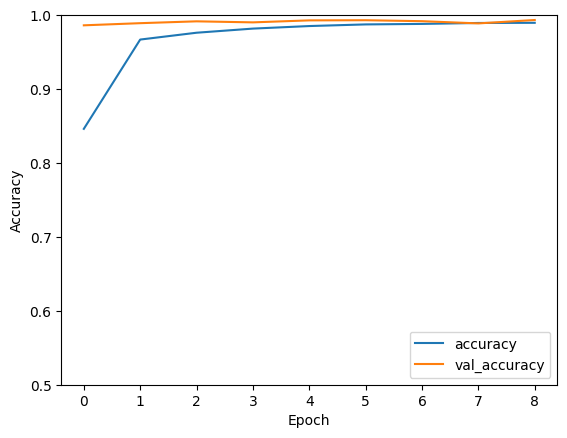

In [6]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_X,  test_y, verbose=2)

In [7]:
predicao=np.argmax(model.predict(test_X),axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [8]:
test_y

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
predicao

array([7, 2, 1, ..., 4, 5, 6])

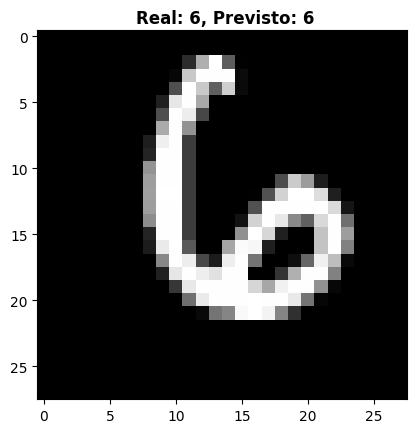

In [25]:
indice_imagem = 88
imagem = test_X[indice_imagem]
label_real = test_y[indice_imagem]
label_previsto = predicao[indice_imagem]
plt.imshow(imagem, cmap='gray')
texto = f"Real: {label_real}, Previsto: {label_previsto}"
plt.text(7, -1, texto, color='black', fontweight='bold', fontsize=12)
plt.show()